In [1]:
import sys
import os
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal
import torch
import time
import imageio

sys.path.append('./src')
from msg.msg import MSGNet


## Load 1 image for fine plotting, downsample by 8

In [2]:
def downsample(ar, factor):
    kernel = np.full((factor, factor), 1 / (factor**2))
    ar = scipy.signal.convolve2d(np.asarray(ar), kernel, mode='full')
    ar = ar[factor-1::factor, factor-1::factor]
    return ar

In [ ]:
current_dir = os.getcwd()
direct = os.path.abspath(os.path.join(current_dir, os.pardir))
directory = direct +'/Data_preprocessing/Dataset_with_simple_geometry'

In [4]:

_rgb_files = directory+'/mydataset_7_00002_img.png'
_dist_files = directory+'/dist2.dat'


guide_imgs = imageio.imread(_rgb_files)
dist_img = torch.load(_dist_files)
target_imgs = dist_img.detach().cpu().numpy()
source_img=downsample(dist_img,8)

        
guide_imgs = np.asarray(guide_imgs[:,:,0:3])      
target_imgs = np.asarray(target_imgs)
source_imgs = np.asarray(source_img)

print(guide_imgs.shape)
print('max value in the image is: ' + str(guide_imgs.max()))
print('min value in the image is: ' + str(guide_imgs.min()))
print(target_imgs.shape)
print('max value in the image is: ' + str(target_imgs.max()))
print('min value in the image is: ' + str(target_imgs.min()))
print(source_imgs.shape)
print('max value in the image is: ' + str(target_imgs.max()))
print('min value in the image is: ' + str(target_imgs.min()))



(480, 720, 3)
max value in the image is: 226
min value in the image is: 10
(480, 720)
max value in the image is: 96.41430554631606
min value in the image is: 63.67227026643547
(60, 90)
max value in the image is: 96.41430554631606
min value in the image is: 63.67227026643547


In [6]:
# test
t = time.time()
model = MSGNet(8)
model.load_state_dict(torch.load('checkpoints/x8_clean.pth')['model_state_dict'])

predict_imgs = model.test(source_imgs,guide_imgs)

predict_imgs = np.asarray(predict_imgs)
error_imgs = target_imgs - predict_imgs
elapsed = time.time() - t
print(elapsed)        

5.209807872772217


Text(0.5, 1.0, 'Guide 480x720')

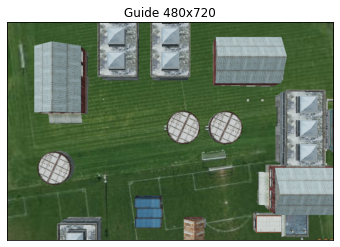

In [7]:
#Guide
plt.imshow(guide_imgs)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.title('Guide 480x720')


Text(0.5, 1.0, 'Source 60x90')

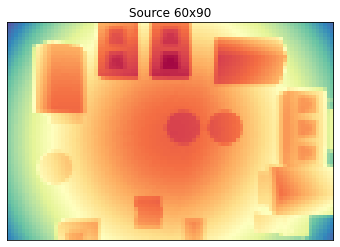

In [8]:
#source image
vmin = np.min(target_imgs)
vmax = np.max(target_imgs)
cmap = 'Spectral'

plt.imshow(source_imgs,vmin = vmin,vmax = vmax,cmap=cmap)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.title('Source 60x90')

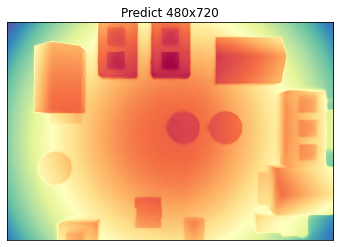

In [9]:
#predict

plt.imshow(predict_imgs,vmin = vmin,vmax = vmax,cmap=cmap)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.title('Predict 480x720')
plt.savefig(directory+'/MSG_P_2.png',bbox_inches='tight')

In [38]:
# # zoom predict
# plt.imshow(predict_imgs[130:190,290:380],vmin = vmin,vmax = vmax,cmap=cmap)
# plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
# plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
# plt.title('Zoomed Predict Patch 60x90')
# plt.savefig('MSG_ZP_60.png',bbox_inches='tight')

In [39]:
# #error zoomed
# error = plt.imshow(error_imgs[0,130:190,290:380],vmin = -10, vmax = 10,interpolation='none')
# cbar1 = plt.colorbar(error,fraction=0.03,pad=0.04)
# plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
# plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
# plt.title('Zoomed Error Patch 60x90')
# plt.savefig('MSG_ZE_60.png',bbox_inches='tight')

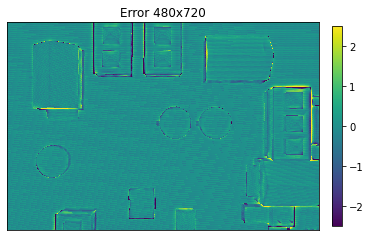

In [11]:
#error 

error = plt.imshow(error_imgs,vmin = -2.5, vmax = 2.5,interpolation='none')
cbar1 = plt.colorbar(error,fraction=0.03,pad=0.04)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.title('Error 480x720')
plt.savefig(directory+'/MSG_E_2.png',bbox_inches='tight')

In [15]:
MAE = np.mean(np.abs(error_imgs))
MAE

0.19926315453602347

In [16]:
# #error distribution
# plt.figure(figsize=(4*1.5,3*1.5))
# plt.hist(error_imgs[0],orientation='horizontal');
# plt.title('Error distribution')
# plt.savefig('MSG_D_39.png',bbox_inches='tight')

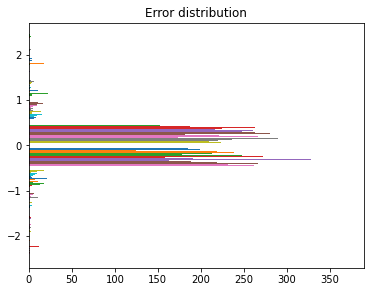

In [17]:
#bounded error distribution 60[-10,10], 39[-5,5]
plt.figure(figsize=(4*1.5,3*1.5))
plt.hist(error_imgs,orientation='horizontal',range=(-2.5,2.5));
plt.title('Error distribution')
plt.savefig(directory+'/MSG_Drange_2.png',bbox_inches='tight')

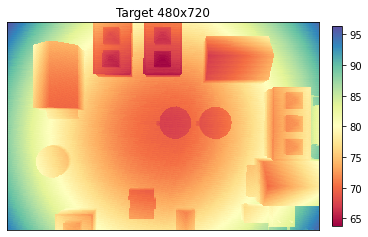

In [18]:
# target
target = plt.imshow(target_imgs,vmin = vmin, vmax = vmax,cmap = cmap,interpolation='none')
cbar1 = plt.colorbar(target,fraction=0.03,pad=0.04)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.title('Target 480x720')
plt.savefig(directory+'/MSG_T_2.png',bbox_inches='tight')